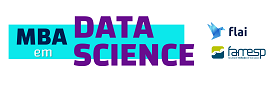

# **Unidades Básicas de Saúde - UBS no Brasil**

## **Entendendo o contexto**

### **Unidades Básicas de Saúde - UBS no Brasil**

No Brasil existe o Sistema Único de Saúde - SUS, sendo que a chamada Atenção Primária, também conhecida como Atenção Básica é sua porta de entrada. 

Com o objetivo de dar orientação e auxiliar a população quanto prevenção de doenças, além de solucionar alguns casos de agravos e ainda dar encaminhamento dos casos mais graves para outras instâncias superiores do SUS em termos de complexidade, a Atenção Básica do SUS pode ser pensada como um filtro, que faz a organização do fluxo de serviços de saúde, sejam eles simples ou complexos, dentro das redes de saúde. 

Para tanto, existem nas diversas comunidades brasileiras mais de 40 mil Unidades Básicas de Saúde, que atendem, sem distinção de cor, idade, sexo ou classe social, os mais de 200 milhões de Brasileiros, oferencendo serviços de vacinação, consultas, exames, dentre outros, na tentativa de resolver a maior parte dos problemas de saúde desta população, evitando a necessidade de ir para equipamentos de maior complexidade de saúde como os Hospitais.

### **O Objetivo da Aula**

Construir uma visualização das localizações das Unidades Básicas de Saúde do município de Salvador na Bahia.

### **O dataset**

Baseado em informações do Cadastro Nacional de Estabelecimentos de Saúde, o Ministério da Saúde do Brasil, disponibiliza, no portal de dados abertos do Brasil, um conjunto de dados, em que cada instância é uma Unidade Básica de Saúde e contém atributos como:

- **cnes:** código Cnes com sete dígitos;

- **uf:** Estado da federação com a localização da UBS;

- **ibge:** Código IBGE do município de localização;

- **nome:** nome do estabelecimento;

- **logradouro:** endereço do estabelecimento de saúde;

- **bairro:** bairro do estabelecimento;

- **latitude:** latitude da localização do estabelecimento;

- **longitude:** longitude da localização.

Links para download do csv contendo os microdados:
- https://dados.gov.br/dataset/unidades-basicas-de-saude-ubs

- https://github.com/jonates/opendata/raw/master/cadastro_estabelecimentos_cnes/cadastro_estabelecimentos_cnes.csv



### **A Biblioteca Folium**

folium é uma biblioteca que aproveita todo o poder do Python para manipulação de dados e da biblioteca leaflet.js para elaboração de mapas.

Para maiores informações do Folium, consulte a documentação no endereço a seguir:

- https://github.com/python-visualization/folium


## **Hands-on**

1. **Preparar o ambiente**;
2. **Carregar dados**;
3. **Entender a estrutura dos dados**;
4. **Transformar dados**;
5. **Elaboração do Cartograma**.

### **Carregando o conjunto de dados**

In [1]:
# Fazendo download do conjunto de dados
!wget --verbose --show-progress --no-check-certificate https://github.com/jonates/opendata/raw/master/cadastro_estabelecimentos_cnes/cadastro_estabelecimentos_cnes.csv


--2022-05-08 05:15:07--  https://github.com/jonates/opendata/raw/master/cadastro_estabelecimentos_cnes/cadastro_estabelecimentos_cnes.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonates/opendata/master/cadastro_estabelecimentos_cnes/cadastro_estabelecimentos_cnes.csv [following]
--2022-05-08 05:15:08--  https://raw.githubusercontent.com/jonates/opendata/master/cadastro_estabelecimentos_cnes/cadastro_estabelecimentos_cnes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4591161 (4.4M) [text/plain]
Saving to: ‘cadastro_estabelecimentos_cnes.csv’

cadastro_estabeleci 100%[===============

In [2]:
# Importando o Pandas
import pandas as pd

In [3]:
# Importando o conjunto de dados da PNAD Contínua
ubs = pd.read_csv(
    filepath_or_buffer = '/content/cadastro_estabelecimentos_cnes.csv', 
    sep=';',
    decimal=','
)
ubs.head()

,CNES,UF,IBGE,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE
0,33820,52,520170,UNIDADE DE SAUDE DA FAMILIA PSF 307,RUA H,NOVO MUNDO,-15.90682,-52.22545
1,108,26,260290,USF ALTO DOS INDIOS,RUA 17,PONTE DOS CARVALHOS,-8.28389,-35.03210
2,116,26,260290,USF CHARNECA II,RUA 02,CHARNECA,-8.28353,-35.02819
3,124,26,260290,USF SAO FRANCISCO I,RUA MANOEL DOMINGOS BARROS,SAO FRANCISCO,-8.28700,-35.03500
4,132,26,260290,USF ROSARIO,RUA 01,ROSARIO,-8.28389,-35.03210


### **Espiando a estrutura dos dados**

In [4]:
# Informacoes gerais do conjunto de dados
ubs.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42807 entries, 0 to 42806
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CNES        42807 non-null  int64  
 1   UF          42807 non-null  int64  
 2   IBGE        42807 non-null  int64  
 3   NOME        42806 non-null  object 
 4   LOGRADOURO  42807 non-null  object 
 5   BAIRRO      42807 non-null  object 
 6   LATITUDE    40635 non-null  float64
 7   LONGITUDE   40640 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.6+ MB


In [5]:
# Verificando valores missing
ubs.isnull().sum()

CNES             0
UF               0
IBGE             0
NOME             1
LOGRADOURO       0
BAIRRO           0
LATITUDE      2172
LONGITUDE     2167
dtype: int64

### **Transformações no Conjunto de dados**

In [6]:
# Retirando registros sem informações
ubs = ubs[(ubs["LATITUDE"].notna()) & \
          (ubs["LONGITUDE"].notna()) & \
          (ubs["NOME"].notna())]

In [7]:
# Verificando valores missing
ubs.isnull().sum()

CNES          0
UF            0
IBGE          0
NOME          0
LOGRADOURO    0
BAIRRO        0
LATITUDE      0
LONGITUDE     0
dtype: int64

In [8]:
# Filtrando somente as UBS localizadas na cidade de Salvador na Bahia
ubs = ubs[ubs['IBGE']==292740]

In [ ]:
# Conferindo a estrutura do conjunto de dados
ubs.shape

### **Mapa com localização das Unidades Básicas de Saúde**

In [9]:
# Importando as bibliotecas necessarias
import folium

In [10]:
# Criando o rotulo dos pontos
ubs['ROTULO'] = ubs['NOME'] + \
                ' | \n Bairro = ' + ubs['BAIRRO'].astype('str') + \
                ' | \n Endereço = '+ubs['LOGRADOURO'].astype('str')

In [11]:
# Espiando o conjunto de dados
ubs.head()

,CNES,UF,IBGE,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE,ROTULO
65,3999,29,292740,UBS MARIA DA CONCEICAO SANTIAGO IMBASSAY,RUA MARQUES DE MARICA,PAU MIUDO,-12.95903,-38.48725,UBS MARIA DA CONCEICAO SANTIAGO IMBASSAY | \n ...
66,4014,29,292740,USF PROFESSOR SABINO SILVA,RUA REINALDO DE MATOS,NORDESTE AMARALINA,-13.00949,-38.47217,USF PROFESSOR SABINO SILVA | \n Bairro = NORDE...
67,4022,29,292740,USF PROF EDUARDO MAMEDE,SETOR E CAMINHO 16,MUSSURUNGA I,-12.92003,-38.36640,USF PROF EDUARDO MAMEDE | \n Bairro = MUSSURUN...
68,4030,29,292740,UBS RODRIGO ARGOLO,RUA PERNAMBUCO,TANCREDO NEVES,-12.94614,-38.44654,UBS RODRIGO ARGOLO | \n Bairro = TANCREDO NEVE...
69,4111,29,292740,UBS SETE DE ABRIL,RUA DA FELICIA,SETE DE ABRIL,-12.97100,-38.51100,UBS SETE DE ABRIL | \n Bairro = SETE DE ABRIL ...


In [12]:
# Criando o  mapa vazio
mapa_ubs = folium.Map(
    width=800, 
    height=600,
    location=[-12.944927, -38.427691],
    zoom_start=11
)



In [13]:
mapa_ubs

In [14]:
# Inserindo os pontos no mapa
for _, pontos in ubs.iterrows():
    folium.Marker(
      location = [pontos['LATITUDE'] , pontos['LONGITUDE']], 
      popup= pontos['ROTULO'],  
      tooltip="Clique aqui e saiba mais!",
      icon=folium.Icon(color='red', icon="plus")
    ).add_to(mapa_ubs)

In [15]:
# Renderizando o mapa
mapa_ubs

### **Faça Você mesmo**

Construa um conjunto de dados com a localização da sua residência e de no mínimo mais 5 locais, públicos ou privado, onde costuma ir com muita frequência ao longo de seus dias como Supermercado Favorito, Farmácia Favorita, Escola (ou Faculdade), Academia, Parque, Estádio, Hospital (Clínica), Restaurante, Shopping, Igreja, etc.

O conjunto de dados deve ter três atributos nome_do_local ; latitude ; longitude.

Depois utiliza os conhecimentos obtidos nesta aula para colocar no mapa marcadores com esses localização desses locais. Por fim, utilize essa visualização para refletir sobre seus trajetos, fluxos e logística e estudar uma maneira de otimizar seu dia a dia em termos de deslocamentos.

Dica: Para obter a latitude e longitude basta utilizar o google maps, encontrar o local, clicar sobre o mapa, e vai aparecer a latitude e longitude. Por exemplo, a imagem abaixo mostra a tela do Google Maps com a latitude e longitude do Hub Salvador, Local onde abrigou a sede da Flai por um período:

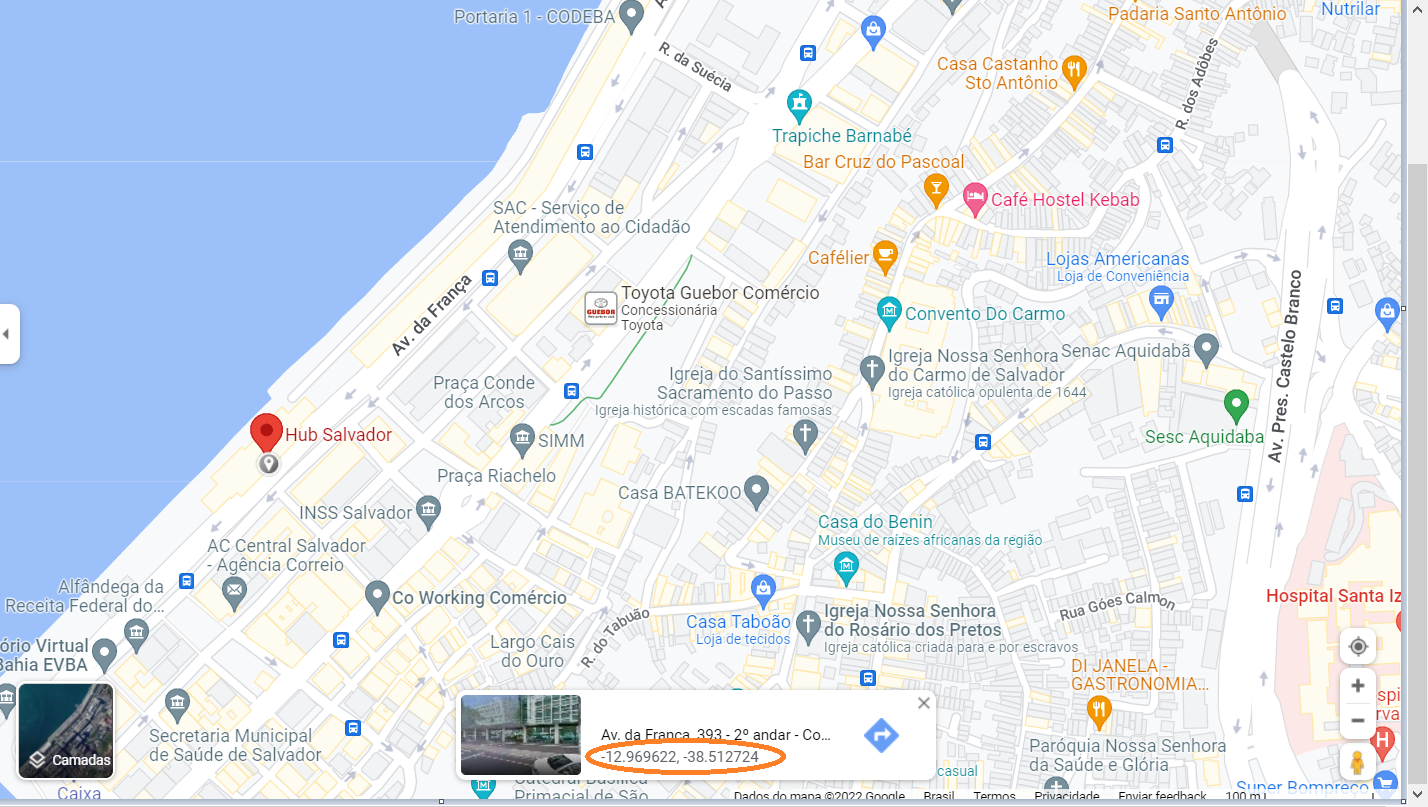